In [44]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

In [54]:
train_data= pd.read_csv("D:\\Internship projects\\movie genre classification\\GenreClassificationDataset\\train_data.txt",sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])

test_data= pd.read_csv("D:\\Internship projects\\movie genre classification\\GenreClassificationDataset\\test_data.txt",sep=":::",names=["ID","TITLE","DESCRIPTION"])

test_data_solution= pd.read_csv("D:\\Internship projects\\movie genre classification\\GenreClassificationDataset\\test_data_solution.txt",sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])

C:\Users\jawad\AppData\Local\Temp\ipykernel_14988\4262903103.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  train_data= pd.read_csv("D:\\Internship projects\\movie genre classification\\GenreClassificationDataset\\train_data.txt",sep=":::",names=["ID","TITLE","GENRE","DESCRIPTION"])
C:\Users\jawad\AppData\Local\Temp\ipykernel_14988\4262903103.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  test_data= pd.read_csv("D:\\Internship projects\\movie genre classification\\GenreClassificationDataset\\test_data.txt",sep=":::",names=["ID","TITLE","DESCRIPTION"])
C:\Users\jawad\AppData\Local\Temp\ipykerne

In [55]:
display(Markdown("### Train DataFrame"))
display(train_data.head())

display(Markdown("### Test DataFrame"))
display(test_data.head())

display(Markdown("### Test Solution DataFrame"))
display(test_data_solution.head())


### Train DataFrame

,ID,TITLE,GENRE,DESCRIPTION
0,1,Oscar et la dame rose (2009),drama,Listening in to a conversation between his do...
1,2,Cupid (1997),thriller,A brother and sister with a past incestuous r...
2,3,"Young, Wild and Wonderful (1980)",adult,As the bus empties the students for their fie...
3,4,The Secret Sin (1915),drama,To help their unemployed father make ends mee...
4,5,The Unrecovered (2007),drama,The film's title refers not only to the un-re...


### Test DataFrame

,ID,TITLE,DESCRIPTION
0,1,Edgar's Lunch (1998),"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),Before he was known internationally as a mart...


### Test Solution DataFrame

,ID,TITLE,GENRE,DESCRIPTION
0,1,Edgar's Lunch (1998),thriller,"L.R. Brane loves his life - his car, his apar..."
1,2,La guerra de papá (1977),comedy,"Spain, March 1964: Quico is a very naughty ch..."
2,3,Off the Beaten Track (2010),documentary,One year in the life of Albin and his family ...
3,4,Meu Amigo Hindu (2015),drama,"His father has died, he hasn't spoken with hi..."
4,5,Er nu zhai (1955),drama,Before he was known internationally as a mart...


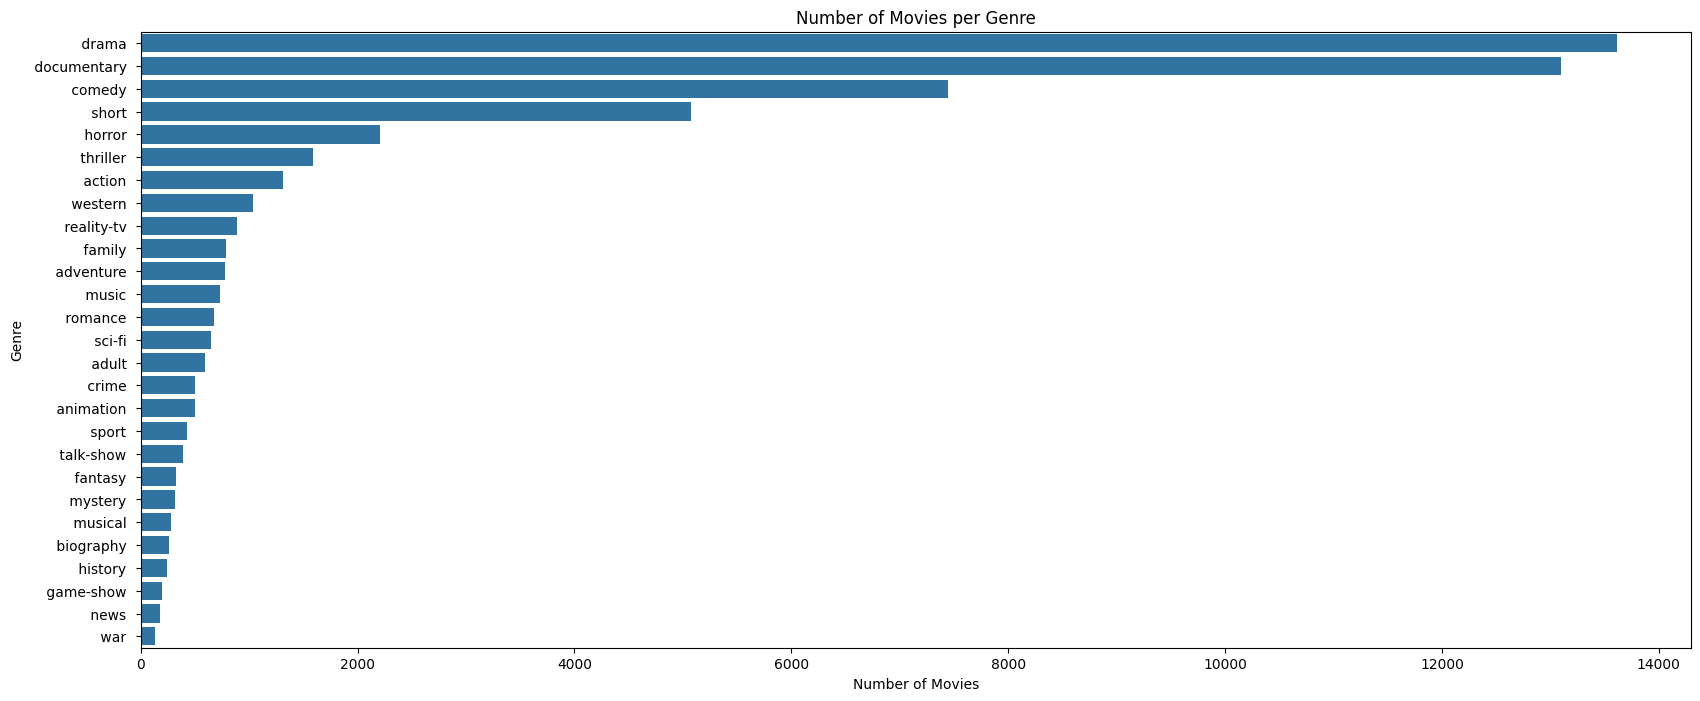

In [45]:
plt.figure(figsize=(20,8))
sns.countplot(y=train_data['GENRE'], order = train_data['GENRE'].value_counts().index)
plt.title('Number of Movies per Genre')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.show()

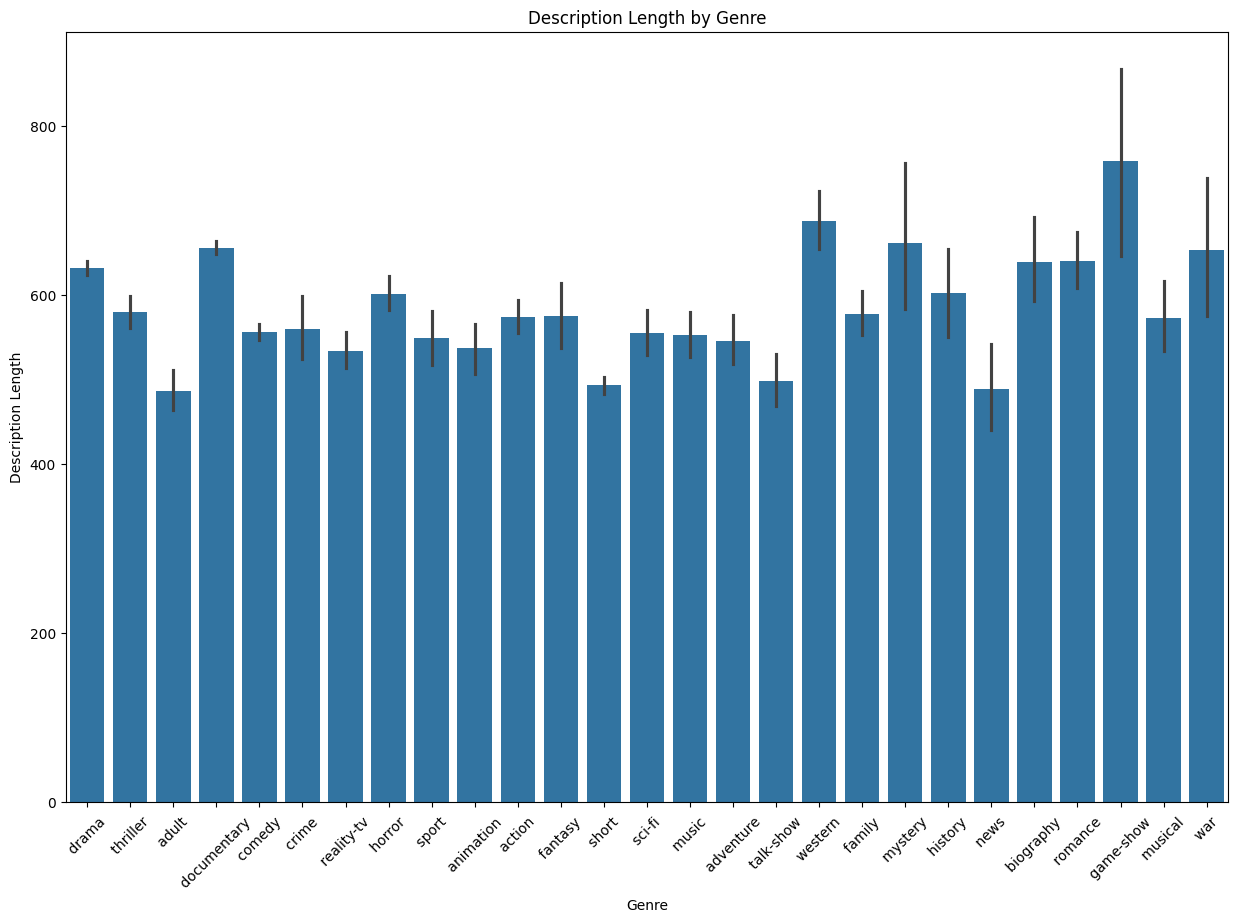

In [46]:
train_data['DESCRIPTION_length'] = train_data['DESCRIPTION'].apply(len)
plt.figure(figsize=(15, 10))
sns.barplot(x='GENRE', y='DESCRIPTION_length', data=train_data)
plt.title('Description Length by Genre')
plt.xticks(rotation=45)
plt.xlabel('Genre')
plt.ylabel('Description Length')
plt.show()

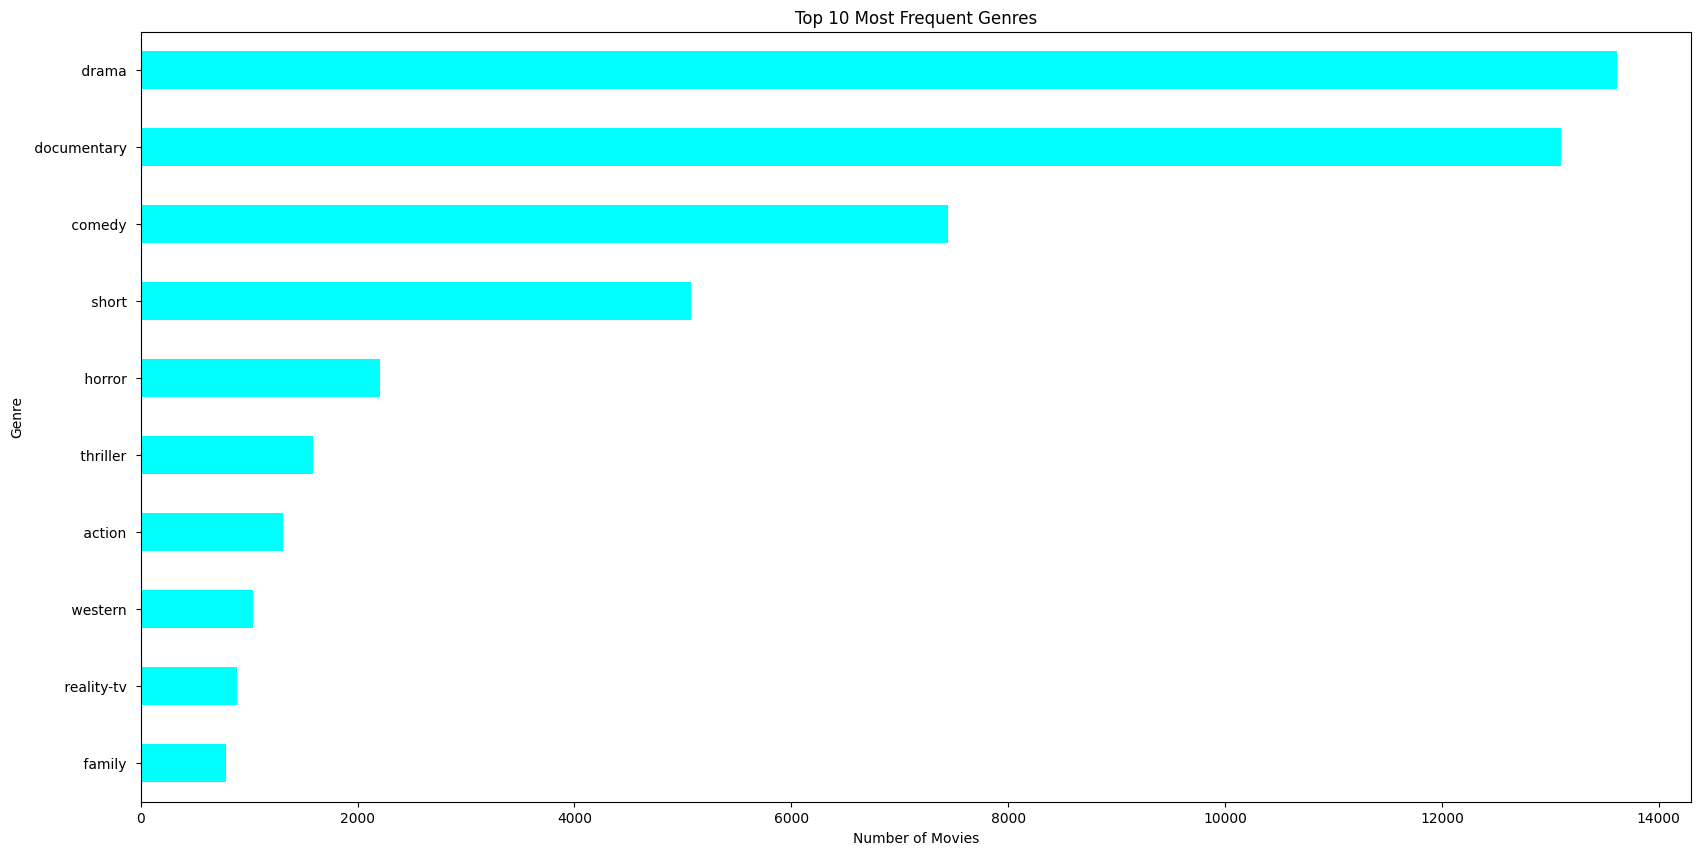

In [47]:
top_genres = train_data['GENRE'].value_counts().head(10)

plt.figure(figsize=(20, 10))
top_genres.plot(kind='barh', color='cyan')
plt.title('Top 10 Most Frequent Genres')
plt.xlabel('Number of Movies')
plt.ylabel('Genre')
plt.gca().invert_yaxis()  # Invert y-axis to have the genre with the most movies at the top
plt.show()

In [56]:
train_data['DESCRIPTION'].fillna("", inplace=True)
test_data['DESCRIPTION'].fillna("", inplace=True)

t_v = TfidfVectorizer(stop_words='english', max_features=100000)
X_train = t_v.fit_transform(train_data['DESCRIPTION'])
X_test = t_v.transform(test_data['DESCRIPTION'])

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(train_data['GENRE'])
y_test = label_encoder.transform(test_data_solution['GENRE'])

C:\Users\jawad\AppData\Local\Temp\ipykernel_14988\3620674413.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_data['DESCRIPTION'].fillna("", inplace=True)
C:\Users\jawad\AppData\Local\Temp\ipykernel_14988\3620674413.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [57]:
X_train_sub, X_val, y_train_sub, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

clf = LinearSVC()
clf.fit(X_train_sub, y_train_sub)

y_val_pred = clf.predict(X_val)
print("Validation Accuracy:", accuracy_score(y_val, y_val_pred))
print("Validation Classification Report:\n", classification_report(y_val, y_val_pred))

Validation Accuracy: 0.5858157336530481
Validation Classification Report:
               precision    recall  f1-score   support

           0       0.45      0.32      0.38       263
           1       0.75      0.43      0.55       112
           2       0.46      0.21      0.29       139
           3       0.44      0.14      0.22       104
           4       0.00      0.00      0.00        61
           5       0.53      0.60      0.56      1443
           6       0.35      0.06      0.10       107
           7       0.69      0.81      0.75      2659
           8       0.56      0.73      0.63      2697
           9       0.36      0.17      0.23       150
          10       0.25      0.05      0.09        74
          11       0.81      0.62      0.70        40
          12       0.00      0.00      0.00        45
          13       0.66      0.67      0.66       431
          14       0.62      0.54      0.58       144
          15       0.25      0.04      0.07        50
      

In [58]:
y_pred = clf.predict(X_test)
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Test Classification Report:\n", classification_report(y_test, y_pred))

Test Accuracy: 0.5795018450184501
Test Classification Report:
               precision    recall  f1-score   support

           0       0.43      0.33      0.37      1314
           1       0.65      0.38      0.48       590
           2       0.50      0.23      0.31       775
           3       0.44      0.14      0.21       498
           4       0.00      0.00      0.00       264
           5       0.54      0.58      0.56      7446
           6       0.29      0.06      0.10       505
           7       0.69      0.82      0.75     13096
           8       0.56      0.71      0.63     13612
           9       0.36      0.15      0.21       783
          10       0.25      0.05      0.08       322
          11       0.80      0.62      0.70       193
          12       0.26      0.02      0.04       243
          13       0.60      0.63      0.61      2204
          14       0.61      0.52      0.56       731
          15       0.35      0.08      0.12       276
          16      

In [59]:
from sklearn.naive_bayes import MultinomialNB
Mnb_classifier = MultinomialNB()
Mnb_classifier.fit(X_train, y_train)

MultinomialNB()

In [60]:
Mnb_classifier.predict(X_test)

array([8, 8, 7, ..., 8, 8, 7], shape=(54200,))

In [61]:
from sklearn.linear_model import LogisticRegression
lr_classifier = LogisticRegression(max_iter=500)
lr_classifier.fit(X_train, y_train)

LogisticRegression(max_iter=500)

In [63]:
lr_classifier.predict(X_test)

array([8, 8, 7, ..., 8, 8, 7], shape=(54200,))

In [62]:
def predict_movie(description):
    t_v1 = t_v.transform([description])
    pred_label = clf.predict(t_v1)
    return label_encoder.inverse_transform(pred_label)[0]

sample_descr_for_movie = "A movie where police chases the criminal and shoot him"
print(predict_movie(sample_descr_for_movie))

sample_descr_for_movie1 = "A movie where person chases a girl too get marry with him but girl refuses him."
print(predict_movie(sample_descr_for_movie1))

 action 
 drama 
